<a href="https://colab.research.google.com/github/veranoviani/Marketing-Channel-Attribution/blob/main/Vera_Noviani_Marketing_Channel_Attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [173]:
# channel attribution analysis and markov modeling
!pip install marketing_attribution_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
!pip install scikit-plot
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
#======Pandas Config========
import pandas as pd
pd.set_option("max_columns",None)

#=======Numpy=========
import numpy as np

#====Stats=====
from marketing_attribution_models import MAM

#=======Visualization======
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#=====Warnings========
import warnings
warnings.filterwarnings("ignore")

def missing_check(df):
  missing = df.isnull().sum()
  missing_per = round(missing/len(df),4)*100
  unique_val = df.nunique()
  type_data = df.dtypes
  df = pd.DataFrame({'Missing_values':missing,
                    'Percent of Missing (%)':missing_per,
                    'Numbers of Unique':unique_val,
                    'Data type':type_data})
  df = df.sort_values(by="Percent of Missing (%)",ascending=False)
  return df

# Load Dataset

## olist_marketing_funnel_dataset

In [176]:
df_close_deal = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_marketing_funnel_dataset/olist_closed_deals_dataset.csv")
df_olist_marketing = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_marketing_funnel_dataset/olist_marketing_qualified_leads_dataset.csv")

## olist_ecommerce_data

In [177]:
df_olist_customer = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_customers_dataset.csv")
df_olist_geolocation = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_geolocation_dataset.csv")
df_olist_order_items = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_items_dataset.csv")
df_olist_payment = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_payments_dataset.csv")
df_olist_reviews = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_reviews_dataset.csv")
df_olist_order = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_orders_dataset.csv")
df_olist_products = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_products_dataset.csv")
df_olist_seller = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_sellers_dataset.csv")
df_olist_category = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/product_category_name_translation.csv")

# Data Inspection

## Olist Marketing Funnel

In [178]:
df_close_deal.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [179]:
df_close_deal['won_date'] = pd.to_datetime(df_close_deal['won_date'])
df_close_deal.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [180]:
df_close_deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               841 non-null    object        
 6   lead_type                      836 non-null    object        
 7   lead_behaviour_profile         665 non-null    object        
 8   has_company                    63 non-null     object        
 9   has_gtin                       64 non-null     object        
 10  average_stock                  66 non-null     object        
 11  business_type      

In [181]:
missing_check(df_close_deal)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
has_company,779,92.52,2,object
has_gtin,778,92.40,2,object
average_stock,776,92.16,6,object
declared_product_catalog_size,773,91.81,33,float64
lead_behaviour_profile,177,21.02,9,object
business_type,10,1.19,3,object
lead_type,6,0.71,8,object
business_segment,1,0.12,33,object
mql_id,0,0.00,842,object
seller_id,0,0.00,842,object


Analysis : <br>
terdapat 4 kolom yang memiliki nilai missing hingga 90% yang dimana kolom ini akan di buang karena tidak memberikan informasi yang akan dicari.

In [182]:
# cols_drop = [x for x in df_close_deal if df_close_deal[x].isnull().sum()/len(df_close_deal)>0.5]

# df_close_deal = df_close_deal.drop(cols_drop,axis=1)
# df_close_deal.shape

In [183]:
df_olist_marketing.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [184]:
df_olist_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [185]:
missing_check(df_olist_marketing)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
origin,60,0.75,10,object
mql_id,0,0.00,8000,object
first_contact_date,0,0.00,336,object
landing_page_id,0,0.00,495,object


In [186]:
df_olist_marketing["origin"].unique()

array(['social', 'paid_search', 'organic_search', 'email', 'unknown',
       'referral', 'direct_traffic', 'display', nan, 'other_publicities',
       'other'], dtype=object)

terlihat bahwa terdapat missing value di data origin yang dimana terdapat nilai other_publicities,unknwon dan other, sehingga nilai-nilai tersebut akan digabung dan di imputasi menjadi other_publicities

In [187]:
df_olist_marketing["origin"] = df_olist_marketing["origin"].fillna("other_publicities")
df_olist_marketing["origin"] = df_olist_marketing["origin"].replace(["unknown","other"],["other_publicities","other_publicities"])

In [188]:
df_olist_marketing["origin"].unique()

array(['social', 'paid_search', 'organic_search', 'email',
       'other_publicities', 'referral', 'direct_traffic', 'display'],
      dtype=object)

In [189]:
#joining data by mql_id
df_join = pd.merge(df_close_deal,df_olist_marketing)
df_join.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-14,22c29808c4f815213303f8933030604c,paid_search
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,other_publicities


# Elice Ecommerce Data

In [190]:
#order items
df_olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [191]:
#order items
df_olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [192]:
missing_check(df_olist_order_items)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
order_id,0,0.0,98666,object
order_item_id,0,0.0,21,int64
product_id,0,0.0,32951,object
seller_id,0,0.0,3095,object
shipping_limit_date,0,0.0,93318,object
price,0,0.0,5968,float64
freight_value,0,0.0,6999,float64


In [193]:
#seller
df_olist_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [194]:
#seller
df_olist_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [195]:
missing_check(df_olist_seller)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
seller_id,0,0.0,3095,object
seller_zip_code_prefix,0,0.0,2246,int64
seller_city,0,0.0,611,object
seller_state,0,0.0,23,object


In [196]:
#Join data
# marketing funnel merged with sellers (this way you get seller location)
df_join = pd.merge(df_join,df_olist_seller)
df_join.head(10)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,seller_zip_code_prefix,seller_city,seller_state
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG
1,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS
2,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,other_publicities,11015,santos,SP
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search,30668,belo horizonte,MG
4,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0,2018-04-13,b76ef37428e6799c421989521c0e5077,other_publicities,92010,canoas,RS
5,0173e8d8b1d94a355b440fb67388f532,87d73636a3acf123e842bb890a4db036,9d12ef1a7eca3ec58c545c678af7869c,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-24 03:00:00,household_utilities,online_medium,eagle,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-18,007f9098284a86ee80ddeb25d53e0af8,paid_search,15190,nhandeara,SP
6,408a9c4a79800232ac656249af3162eb,b566ab0ef88016e00422755e305103c6,de63de0d10a6012430098db33c679b0b,d3d1e91a157ea7f90548eef82f1955e3,2018-02-23 13:54:40,construction_tools_house_garden,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b6885f18d203a61176418c1fb3764815,paid_search,37640,extrema,MG
7,c556184b3fe2087834850b68fa435cee,2d2322d842118867781fc737e96d59a1,09285259593c61296eef10c734121d5b,2695de1affa7750089c0455f8ce27021,2018-05-22 13:24:08,household_utilities,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-15,22c29808c4f815213303f8933030604c,direct_traffic,5879,sao paulo,SP
8,ab11f58a6bf7036a656364b0ba68fb74,9e7c5f4d7770eab65738cca38f9efccf,068066e24f0c643eb1d089c7dd20cd73,de63de0d10a6012430098db33c679b0b,2018-04-10 03:00:00,sports_leisure,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-05,1ceb590cd1e00c7ee95220971f82693d,paid_search,2562,sao paulo,SP
9,450b97a48568c3118ff397f73abe4e4a,df91910b6a03bb2e3358fa6a35e32f6f,09285259593c61296eef10c734121d5b,060c0a26f19f4d66b42e0d8796688490,2018-04-10 19:21:54,food_drink,online_medium,cat,NaN,NaN,NaN,manufacturer,NaN,0.0,2018-04-03,2f08471dfb83baef522f952438a36f6e,referral,9560,sao paulo,SP


In [197]:
#join data
# marketing funnel merged with items (this way you get products sold by sellers)
df_join = pd.merge(df_join,df_olist_order_items)
df_join.head(10)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,1efcc6ba75b519535a510c53153a9256,1,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76
1,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,d8d281c1a1398a1e835fdc4adfb81e2a,1,9e0873e9ac04b12f282b81af5daebd2e,2018-07-30 09:31:49,664.0,38.41
2,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,e5858127da61f07285827883e605254b,1,9bb2d066e4b33b624cbdfec7d50b3dcb,2018-06-27 16:00:04,99.8,15.00
3,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,0475d054d40280dfba750663c9ad7a0a,1,a86859b91d632c991b914aead6ec8ad4,2018-08-07 17:35:18,49.9,13.69
4,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,05104976125ea1e5cc04bc1f506a436a,1,63bfa27a0cee21fd896dc27f58b6d656,2018-08-19 22:44:03,198.9,18.32
5,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,05f8021cf7217f1990addecad0e24b7a,1,d670c0f6be30a062ebd8f8612ea82d71,2018-08-23 21:04:25,178.9,19.35
6,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,087f003cb486254f7454eead9265e992,1,22a8168cf1f1c6347da8d29863b7f75e,2018-07-05 12:20:27,298.5,17.76
7,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,0be098c4a208559b0e6c96c3254481a7,1,22a8168cf1f1c6347da8d29863b7f75e,2018-07-05 10:30:46,298.5,17.19
8,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,101625de5f3ea8064a2900b7b9235491,1,8ae7db511529da9af9685c9d0375bd82,2018-08-13 16:15:09,154.9,19.23
9,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565

# Nomor 1

# Channel Attribution by Model

In [198]:
# revenue
df_join['revenue'] = df_join['price'] * df_join['order_item_id']

In [199]:
# transactions
df_join['transactions'] = df_join['order_item_id'].groupby(df_join['seller_id']).transform('sum')

df_join.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,revenue,transactions
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,1efcc6ba75b519535a510c53153a9256,1,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76,94.2,3
1,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,d8d281c1a1398a1e835fdc4adfb81e2a,1,9e0873e9ac04b12f282b81af5daebd2e,2018-07-30 09:31:49,664.0,38.41,664.0,3
2,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,e5858127da61f07285827883e605254b,1,9bb2d066e4b33b624cbdfec7d50b3dcb,2018-06-27 16:00:04,99.8,15.00,99.8,3
3,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,0475d054d40280dfba750663c9ad7a0a,1,a86859b91d632c991b914aead6ec8ad4,2018-08-07 17:35:18,49.9,13.69,49.9,114
4,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,05104976125ea1e5cc04bc1f506a436a,1,63bfa27a0cee21fd896dc27f58b6d656,2018-08-19 22:44:03,198.9,18.32,198.9,114


In [200]:
# Calculate number of transactions and its values based for each user and each channel.
aggregated_data = df_join.groupby(['seller_id', 'business_segment' , 'business_type' , 'origin'],as_index=False).agg(
    {
        'order_item_id': 'sum',
        'revenue': 'sum'
    }
).rename(
    columns={"order_item_id":"transactions"}
).sort_values(by=['transactions'], ascending = False).copy()

aggregated_data.sort_values("revenue",ascending=False)

,seller_id,business_segment,business_type,origin,transactions,revenue
185,7d13fca15225358621be4086e1eb0964,watches,reseller,other_publicities,603,116192.18
290,c70c1b0d8ca86052f45a432a38b73958,health_beauty,reseller,paid_search,441,47621.34
266,ba90964cff9b9e0e6f32b23b82465f7b,small_appliances,reseller,organic_search,38,44212.50
142,612170e34b97004b3ba37eae81836b4c,home_appliances,reseller,organic_search,114,23264.62
141,6061155addc1e54b4cfb51c1c2a32ad8,pet,reseller,organic_search,45,16069.40
...,...,...,...,...,...,...
362,f1fdf2d13186575751aa25876536d85c,sports_leisure,reseller,organic_search,1,26.30
135,5e063e85d44b0f5c3e6ec3131103a57e,health_beauty,reseller,organic_search,1,22.90
271,bc8c8d665ec4664d286be0d521722b19,food_drink,reseller,organic_search,1,22.50
268,bb7ad8a45c027be8ab075b8e465f8ca0,household_utilities,manufacturer,paid_search,2,19.98


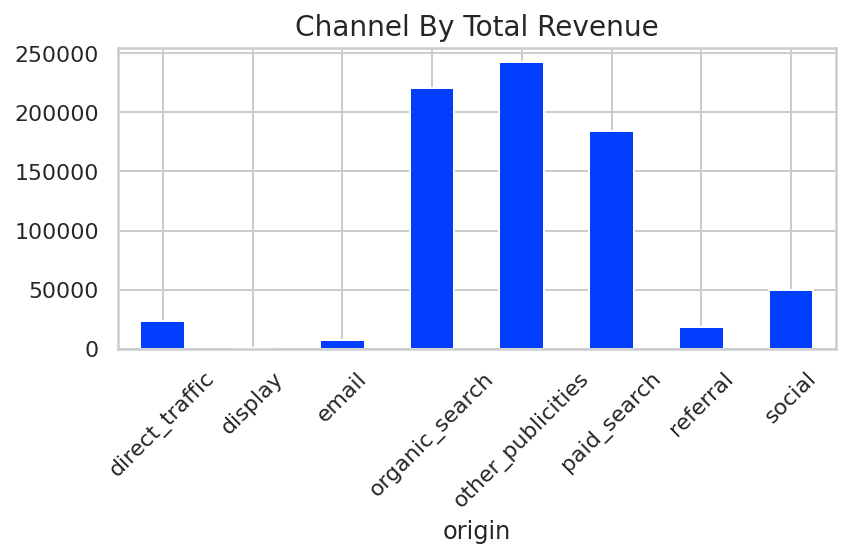

In [201]:
#===Visualisasi=====

plt.subplot()
aggregated_data.groupby("origin")["revenue"].sum().plot(kind='bar')
plt.title("Channel By Total Revenue",fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Dilihat dari chanel by total revenue terdapat 3 chanel yang mendatang keuntungan terbesar yaitu other_publicities , organic_search dan paid_search

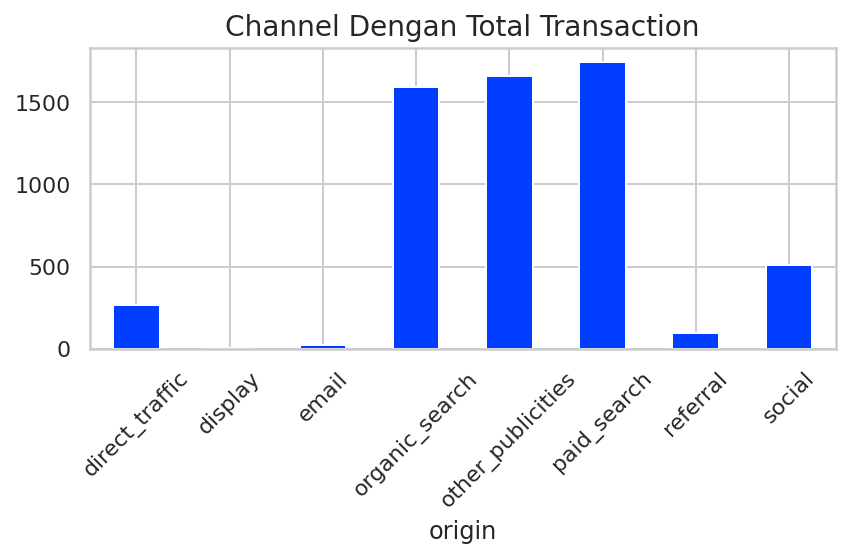

In [202]:
plt.subplot()
aggregated_data.groupby("origin")["transactions"].sum().plot(kind="bar")
plt.title("Channel Dengan Total Transaction",fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Dilihat dari chanel by total transaction terdapat 3 chanel yang memiliki transaction terbesar yaitu paid_search , other_publicities dan organic_search

## Model

In [203]:
# change Date column to Date-type
df_join['first_contact_date'] = pd.to_datetime(df_join['first_contact_date'], format='%Y-%m-%d')

In [204]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 0 to 5043
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         5044 non-null   object        
 1   seller_id                      5044 non-null   object        
 2   sdr_id                         5044 non-null   object        
 3   sr_id                          5044 non-null   object        
 4   won_date                       5044 non-null   datetime64[ns]
 5   business_segment               5044 non-null   object        
 6   lead_type                      4996 non-null   object        
 7   lead_behaviour_profile         3303 non-null   object        
 8   has_company                    30 non-null     object        
 9   has_gtin                       30 non-null     object        
 10  average_stock                  30 non-null     object        
 11  business_type    

In [205]:
# data preprocessing
df_join['revenue'].fillna(0, inplace=True)
df_join['has_transaction'] = df_join.transactions.apply(lambda x: True if x > 0 else False)

In [206]:
data_model = df_join[["landing_page_id","first_contact_date","revenue","origin", "has_transaction"]]

In [207]:
attribution = MAM(
    data_model, 
    channels_colname='origin',
    group_channels=True, 
    group_channels_by_id_list=['landing_page_id'], 
    group_timestamp_colname='first_contact_date',
    journey_with_conv_colname='has_transaction',
    create_journey_id_based_on_conversion = True,
    conversion_value='revenue'
)

In [208]:
#first click
attribution.attribution_first_click()

(0       [269.9]
 1       [13.62]
 2        [19.6]
 3       [19.65]
 4       [22.35]
          ...   
 5039     [14.8]
 5040     [19.9]
 5041     [34.9]
 5042     [9.99]
 5043     [9.99]
 Length: 5044, dtype: object, channels
 direct_traffic        23871.01
 display                 923.00
 email                  8521.99
 organic_search       220707.66
 other_publicities    242334.33
 paid_search          184304.26
 referral              18730.79
 social                49996.40
 Name: value, dtype: float64)

In [209]:
#last click
attribution.attribution_last_click()

(0       [269.9]
 1       [13.62]
 2        [19.6]
 3       [19.65]
 4       [22.35]
          ...   
 5039     [14.8]
 5040     [19.9]
 5041     [34.9]
 5042     [9.99]
 5043     [9.99]
 Length: 5044, dtype: object,
             channels  attribution_last_click_heuristic
 0     direct_traffic                          23871.01
 1            display                            923.00
 2              email                           8521.99
 3     organic_search                         220707.66
 4  other_publicities                         242334.33
 5        paid_search                         184304.26
 6           referral                          18730.79
 7             social                          49996.40)

In [210]:
#linear click
attribution.attribution_linear()

(0       [269.9]
 1       [13.62]
 2        [19.6]
 3       [19.65]
 4       [22.35]
          ...   
 5039     [14.8]
 5040     [19.9]
 5041     [34.9]
 5042     [9.99]
 5043     [9.99]
 Length: 5044, dtype: object,
             channels  attribution_linear_heuristic
 0     direct_traffic                      23871.01
 1            display                        923.00
 2              email                       8521.99
 3     organic_search                     220707.66
 4  other_publicities                     242334.33
 5        paid_search                     184304.26
 6           referral                      18730.79
 7             social                      49996.40)

In [211]:
#markov chain
# create markov results
markov_results = attribution.attribution_markov(transition_to_same_state=False)

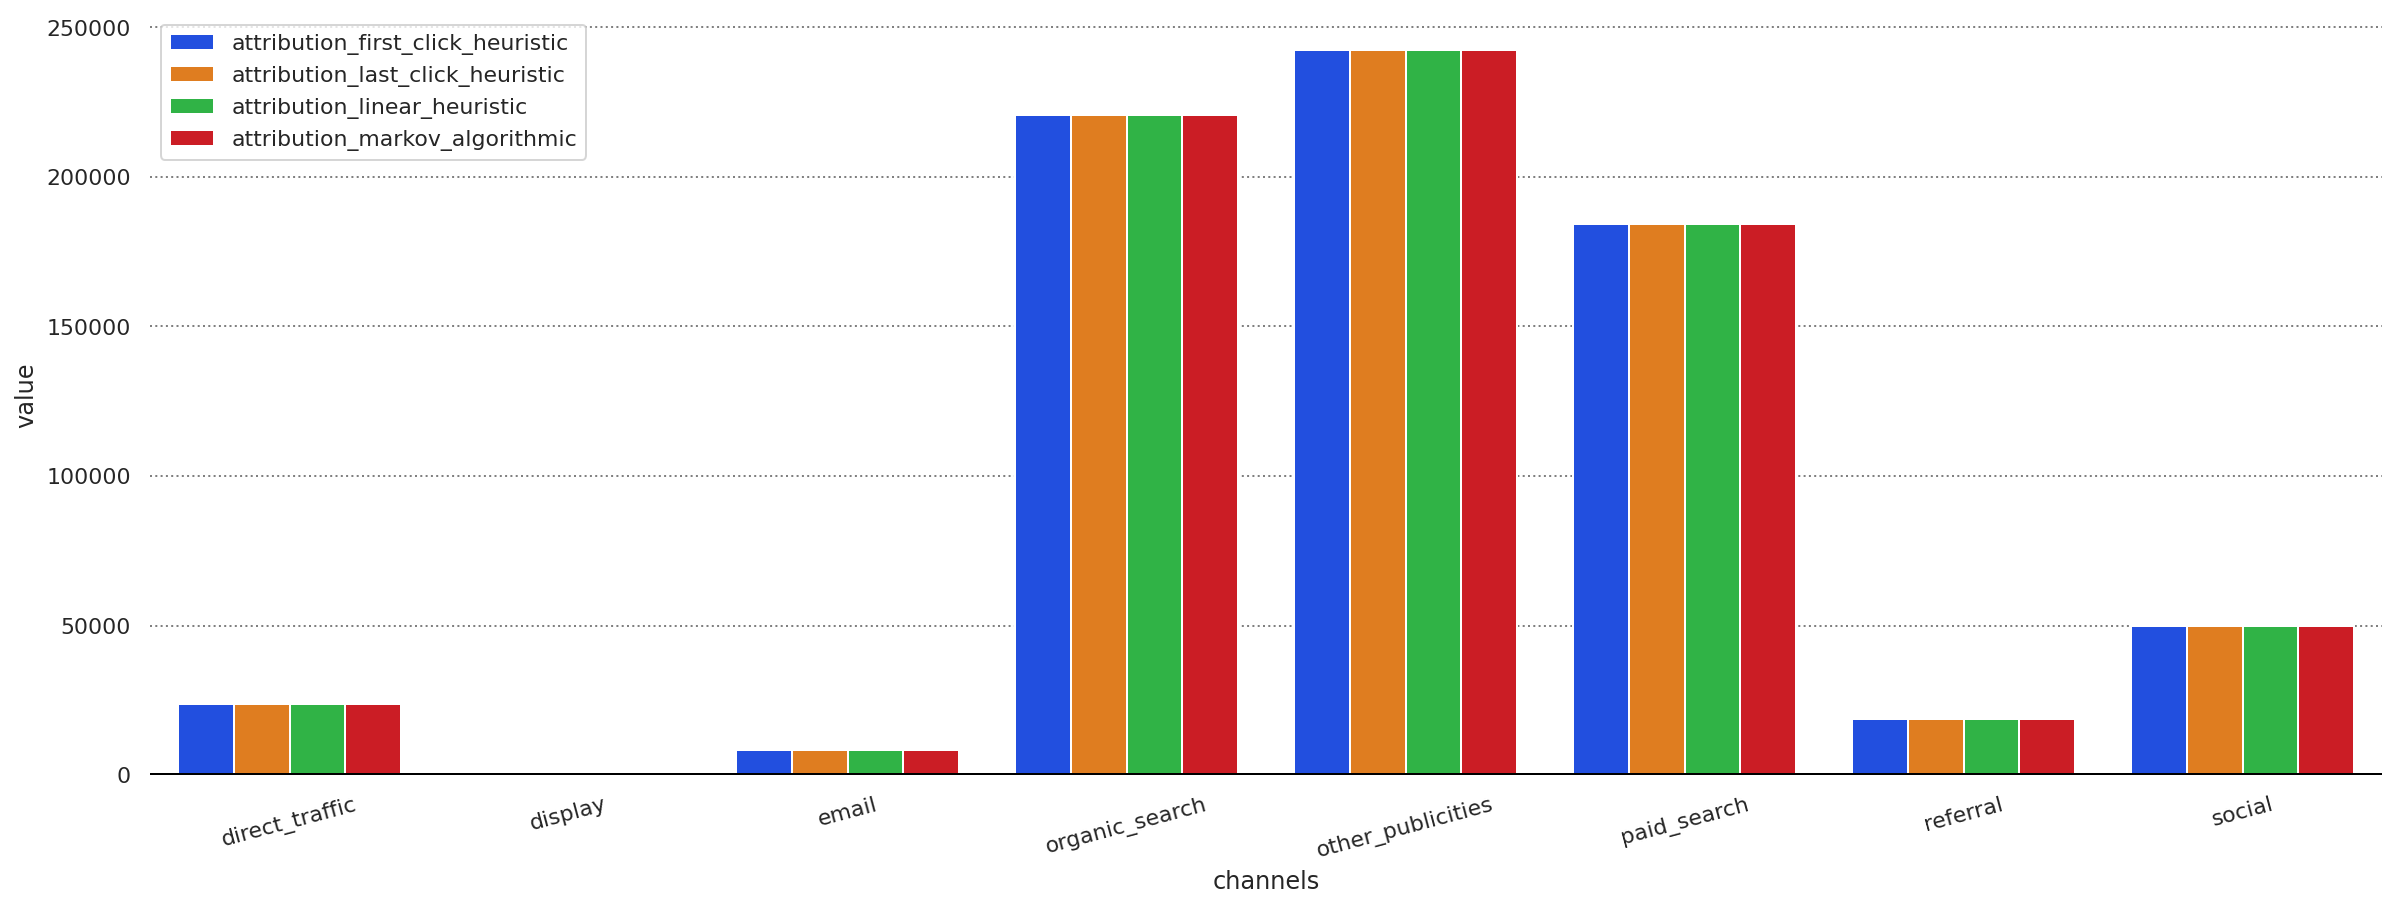

In [212]:
attribution.plot();

Ternyata orther publicities merupakan chanel dengan first click,last click,linear click dan markov chain terbesar disusul dengan organic search dan juga paid search 

# Nomor 2 : Removal Effect

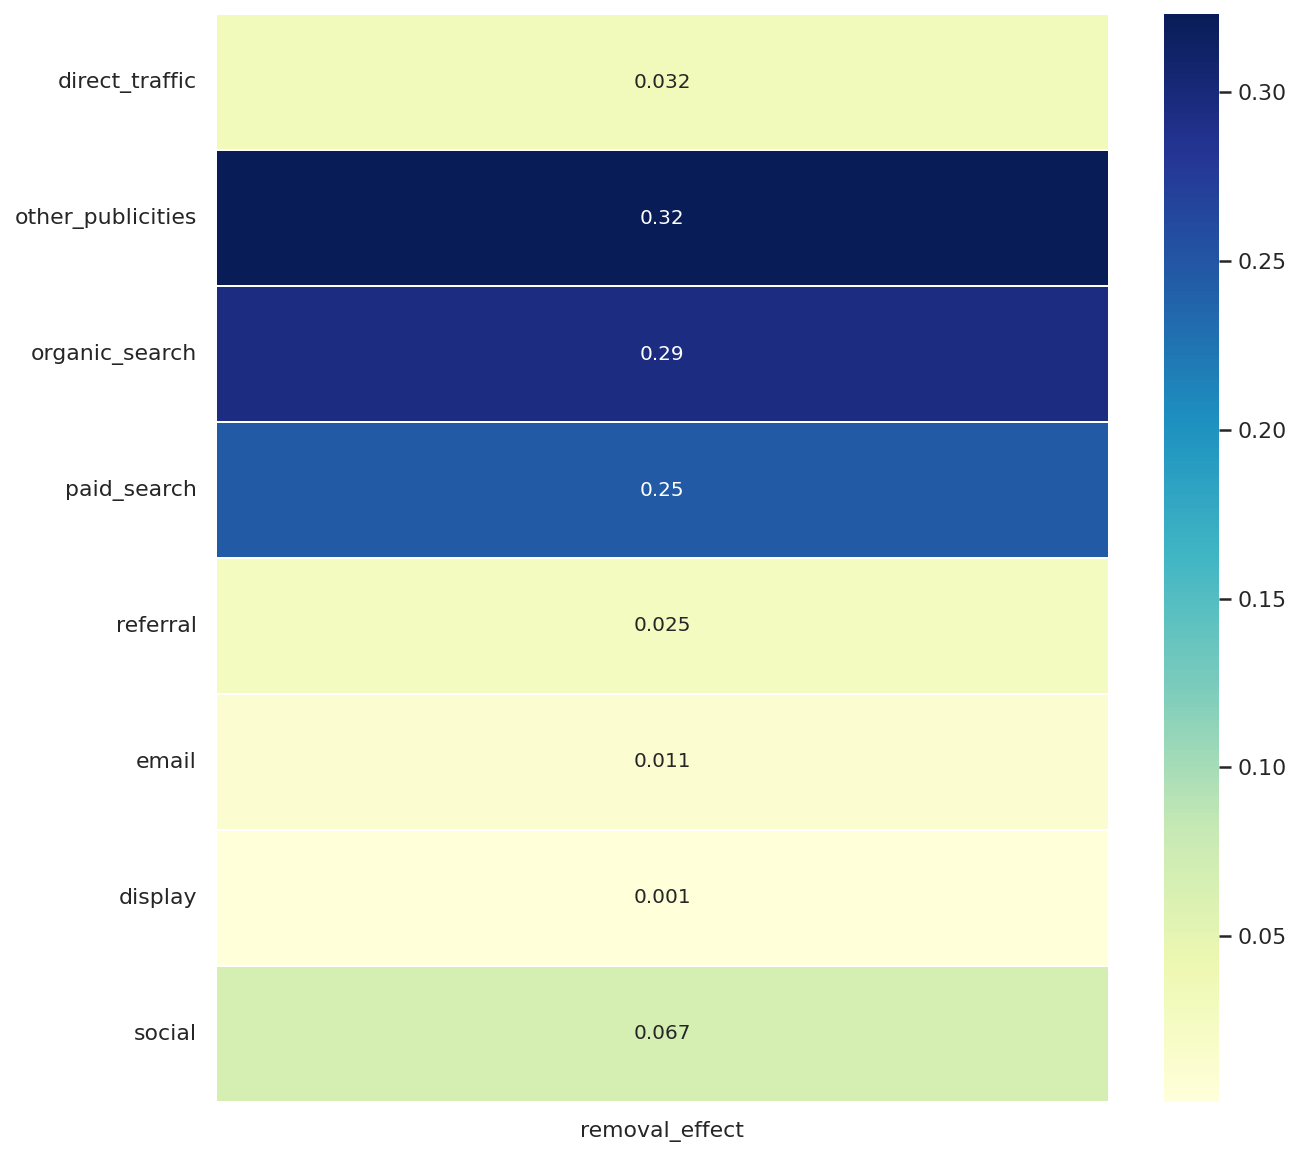

In [213]:
# check removal effects
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(
    markov_results[3].round(3), 
    cmap="YlGnBu", 
    annot=True, 
    linewidths=.5
);

Dilihat dari removal effect bahwa other_publicities memiliki kontribusi yang cukup besar sebanyak 30% selanjutnya organic_search dan paid_search.

Sementara yang memiliki kontribusi kecil yaitu display sebanyak 0,1% selanjutnya email sebanyak 1,1% dan direct_traffic 3,2% . 

Maka setidaknya menggunakan channel melalui origin tersebut perlu dikurangi dan mencari tahu origin dari other_publicities tersebut.

# Nomor 3

In [266]:
# drop kolom yang tidak diperlukan
df_model = df_join.drop(['seller_id', 'mql_id', 'sdr_id', 'sr_id',
       'average_stock', 'business_type',
       'declared_product_catalog_size', 'declared_monthly_revenue',
       'landing_page_id',
       'seller_zip_code_prefix', 'order_id',
       'order_item_id', 'product_id', 'shipping_limit_date', 'price',
       'freight_value', 'revenue', 'transactions'],axis=1)

In [267]:
# change Date columns to Date-type
df_model['won_date'] = pd.to_datetime(df_model['won_date'])
df_model['first_contact_date'] = pd.to_datetime(df_model['first_contact_date'])

# take only date of won_date
df_model['won_date'] = df_model['won_date'].dt.date
df_model['won_date'] = pd.to_datetime(df_model['won_date'])

In [268]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 0 to 5043
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   won_date                5044 non-null   datetime64[ns]
 1   business_segment        5044 non-null   object        
 2   lead_type               5044 non-null   object        
 3   lead_behaviour_profile  5044 non-null   object        
 4   has_company             30 non-null     object        
 5   has_gtin                30 non-null     object        
 6   first_contact_date      5044 non-null   datetime64[ns]
 7   origin                  5044 non-null   object        
 8   seller_city             5044 non-null   object        
 9   seller_state            5044 non-null   object        
 10  has_transaction         5044 non-null   bool          
dtypes: bool(1), datetime64[ns](2), object(8)
memory usage: 567.4+ KB


In [269]:
#convertion sukses ketika won_date == firstdate
df_model['converted'] = np.where(df_model['won_date']==df_model['first_contact_date'],1,0)
df_model['converted'].value_counts()

0    4342
1     702
Name: converted, dtype: int64

In [270]:
df_model.head()

,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,first_contact_date,origin,seller_city,seller_state,has_transaction,converted
0,2018-02-26,pet,online_medium,cat,NaN,NaN,2018-02-21,organic_search,belo horizonte,MG,True,0
1,2018-02-26,pet,online_medium,cat,NaN,NaN,2018-02-21,organic_search,belo horizonte,MG,True,0
2,2018-02-26,pet,online_medium,cat,NaN,NaN,2018-02-21,organic_search,belo horizonte,MG,True,0
3,2018-06-05,home_appliances,online_big,cat,NaN,NaN,2018-04-03,organic_search,novo hamburgo,RS,True,0
4,2018-06-05,home_appliances,online_big,cat,NaN,NaN,2018-04-03,organic_search,novo hamburgo,RS,True,0


In [271]:
missing_check(df_model)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
has_company,5014,99.41,2,object
has_gtin,5014,99.41,2,object
won_date,0,0.00,118,datetime64[ns]
business_segment,0,0.00,29,object
lead_type,0,0.00,7,object
lead_behaviour_profile,0,0.00,7,object
first_contact_date,0,0.00,142,datetime64[ns]
origin,0,0.00,8,object
seller_city,0,0.00,166,object
seller_state,0,0.00,13,object


In [272]:
df_model = df_model.drop(['has_company',"has_gtin"],axis=1)

#impute other for kolom with percentage missin > 5%
df_join['lead_behaviour_profile'] = df_join['lead_behaviour_profile'].fillna("other")
df_join['seller_city'] = df_join['seller_city'].fillna("other")
df_join['seller_state'] = df_join['seller_state'].fillna("other")

#impute modus
df_join["lead_type"] = df_join["lead_type"].fillna(df_join["lead_type"].mode()[0])
df_join["business_segment"] = df_join["business_segment"].fillna(df_join["business_segment"].mode()[0])


missing_check(df_join)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
declared_product_catalog_size,5044,100.00,0,float64
has_company,5014,99.41,2,object
has_gtin,5014,99.41,2,object
average_stock,5014,99.41,4,object
business_type,5,0.10,2,object
seller_state,0,0.00,13,object
order_id,0,0.00,4512,object
order_item_id,0,0.00,7,int64
mql_id,0,0.00,380,object
seller_zip_code_prefix,0,0.00,360,int64


In [273]:
df_join.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,revenue,transactions,has_transaction
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,1efcc6ba75b519535a510c53153a9256,1,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76,94.2,3,True
1,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,d8d281c1a1398a1e835fdc4adfb81e2a,1,9e0873e9ac04b12f282b81af5daebd2e,2018-07-30 09:31:49,664.0,38.41,664.0,3,True
2,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,30421,belo horizonte,MG,e5858127da61f07285827883e605254b,1,9bb2d066e4b33b624cbdfec7d50b3dcb,2018-06-27 16:00:04,99.8,15.00,99.8,3,True
3,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,0475d054d40280dfba750663c9ad7a0a,1,a86859b91d632c991b914aead6ec8ad4,2018-08-07 17:35:18,49.9,13.69,49.9,114,True
4,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,93542,novo hamburgo,RS,05104976125ea1e5cc04bc1f506a436a,1,63bfa27a0cee21fd896dc27f58b6d656,2018-08-19 22:44:03,198.9,18.32,198.9,114,True


In [274]:
# varible model
y = df_model['converted']
X = df_model.drop(['converted', 'won_date', 'first_contact_date'], axis = 1)

In [275]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [276]:
# hitung frekuensi training
col_freq = ['seller_city', 'business_segment', 'seller_state', 'origin', 'lead_type', 'origin', 'lead_behaviour_profile']
for col in col_freq:
  fe = X_train.groupby(col).size()/len(X_train)
  X_train.loc[:, col] = X_train[col].map(fe)

# hitung frekuensi test
col_freq = ['seller_city', 'business_segment', 'seller_state', 'origin', 'lead_type', 'origin', 'lead_behaviour_profile']
for col in col_freq:
  fe = X_test.groupby(col).size()/len(X_test)
  X_test.loc[:, col] = X_test[col].map(fe)

In [277]:
X_train.head()

,business_segment,lead_type,lead_behaviour_profile,origin,seller_city,seller_state,has_transaction
627,0.120397,0.374788,0.350425,0.291501,0.130595,0.706799,True
1945,0.054958,0.405382,0.350425,0.291501,0.204816,0.706799,True
2785,0.160340,0.374788,0.375071,0.268839,0.002550,0.706799,True
3275,0.160340,0.405382,0.375071,0.004249,0.204816,0.706799,True
423,0.120397,0.374788,0.350425,0.291501,0.130595,0.706799,True


In [278]:
y_train.head()

627     0
1945    0
2785    0
3275    0
423     0
Name: converted, dtype: int64

In [279]:
# modelling
from sklearn.ensemble import RandomForestClassifier

In [280]:
rf = RandomForestClassifier()

In [281]:
RandomForestClassifier()

RandomForestClassifier()

In [282]:
rf.fit(X_test, y_test)

RandomForestClassifier()

In [283]:
# predict
pred_result = rf.predict(X_test)
pred_proba_result = rf.predict_proba(X_test)

In [284]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import sklearn.metrics as metrics
import scikitplot as skplt

# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not converted','converted'], output_dict=True))

,not converted,converted,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,1303.0,211.0,1.0,1514.0,1514.0


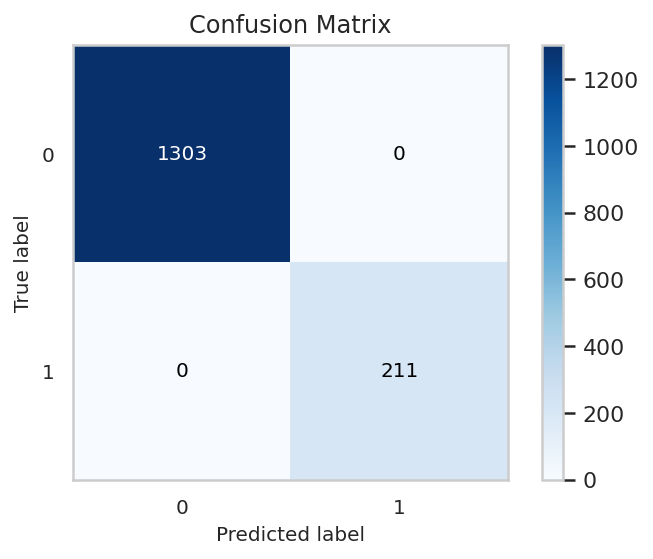

In [285]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

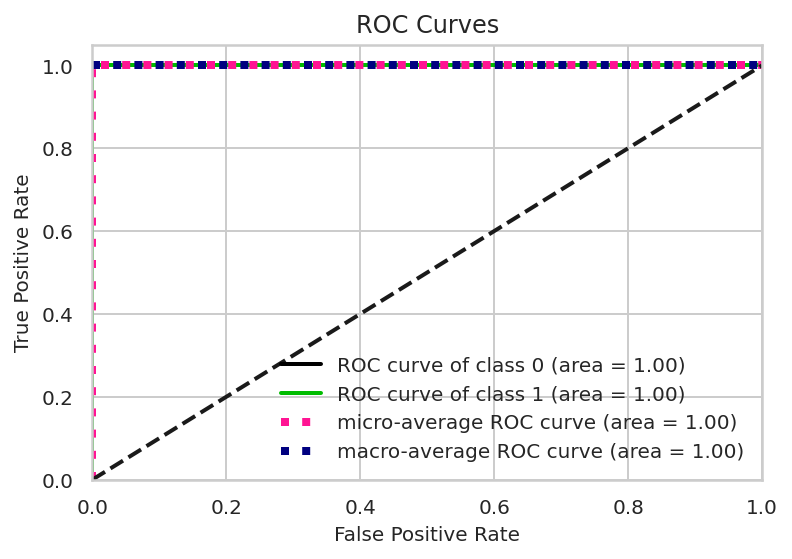

In [286]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

In [287]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.58, G-Mean=1.0


In [288]:
y_pred = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

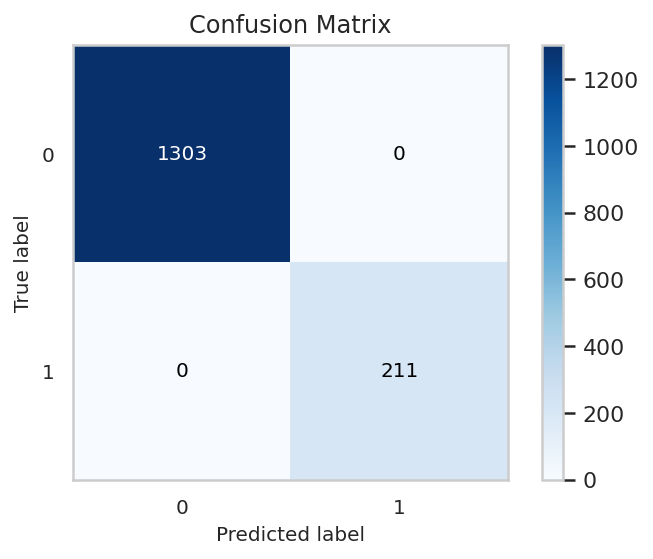

In [289]:
# visualisasi threshold dengan confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

In [291]:
pd.DataFrame(metrics.classification_report(y_test, y_pred, target_names=['not converted','converted'], output_dict=True))

,not converted,converted,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,1303.0,211.0,1.0,1514.0,1514.0


Dimana dilihat dari model tersebut memiliki tingkat recall yang cukup bagus dan F1-score yang cukup baik

In [292]:
## intrepretabel
import dalex as dx
rf_exp = dx.Explainer(rf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 3530 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3530 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f443577f320> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.141, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.51, mean = -0.0018, max = 0.96
  -> model_info        : package sklearn

A new explainer has been created!


In [293]:
rf_exp.model_parts().plot()

Result :

Berdasarkan data tersebut bahwa yang mempengaruhi suatu deals dimana adalah busines segment yang tepat selain itu seller city dimana barang dan product tersebut dapat terjual.

Jadi untuk seorang marketing dengan channel yang telah diketahui bisa memaksimalkannya kembali melalui busines segment yang sudah di targetkan melalui product atau barang yang di pasarkan dengan melihat city seller yang paling berpontensi untuk meningkatkan strategi dalam penjualan.

